<a href="https://colab.research.google.com/github/codestates/ds-section1-sprint3-new/blob/main/n134%20-%20Gradient%20Descent/n134%20-%20Gradient_Desceint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

---

# 경사하강법 (Gradient Descent)

## 🏆 학습 목표 

- 미분의 개념을 이해할 수 있다.
- Gradient Descent에 대해 설명할 수 있다.
- Linear Regression의 학습을 Gradient Descent를 이용해 설명할 수 있다.

# **Part 0. 도입**

<img src = 'https://i.imgur.com/9OQX0GX.png' width="500" height="300">

## **Part 0. 기획 배경**

여러분들은 섹션1의 마지막 노트에 다다랐습니다! <br> 

이 마지막 노트에서 여러분들은 **경사하강법**을 배우게되실 텐데요, <br>
이 개념을 배우는 배경은 앞으로 여러분이 배울 **`섹션 2의 머신러닝`**과 **`섹션 4의 딥러닝`**를 이해하기 위해서 입니다.

머신러닝 그리고 데이터 사이언스에서 추후 여러분들은 모델을 **`최적화, optimization`** 하게 됩니다. <br> 최적화란 무엇이고, 모델이 최적화 되는 과정을 **경사하강법**을 통해 배워보도록 합니다.<br>

우선 경사하강법을 배우기전, <br> 
그것을 이해하기 위한 수학 개념인 **미분**을 배워보도록 합니다. <br> 미분이 어떤 것인지 이해하고 연습한다면 미분이라는 벽을 넘어 **경사하강법**까지 이해해 보도록 합니다!

# **Part 1. 미분이란**

미분이란 단어는 **`작을 미(微)`**와 **`나눌 분(分)`**으로 <br> 
즉, **작게 나눈다**라는 의미입니다. 
무엇을 작게 나누는 것일까요? 바로 **함수**입니다. <br> 

<br>

- 우선, 함수란 무엇일까요?
  -  함수는 간단하게 $x$라는 값을 넣으면 $f(x)$라는 결과값을 내보내주는 기계를 생각하시면 됩니다. 자주 쓰이는 예시는 세탁기를 생각해보시면 됩니다. **`세탁물, x`**을 넣고, 버튼을 누르면 **`깨끗해진 세탁물, f(x)`**을 내보내주는 것이죠. <br>
  - 아래의 이미지와 같이 $x$는 3이라는 input을 함수 $f(x) = x^2$에 넣어주면 output으로 9가 나오는것을 확인 할 수 있습니다.<br>
  <img src = "https://i.imgur.com/1aDgQHJ.png" width='200' height='200'>

<br>

- 그럼, 함수를 작게 나눈다는 것은 어떤 의미일까요? <br>
  - $x$의 값을 아주 아주 미세하게 변화 시킨 후, 예를 들면 $x$의 변화값을 0.00000000000000000001 혹은 0에 최대한 가깝게 변화시킨뒤, <br>
그 결과값 $f(x)$이 어떻게 바뀌는지를 보는 것이 함수를 작게 나눈다는 뜻입니다. 

<br>

- 그러면 이 개념이 어떻게 미분과 연결될까요? <br>
  - 미분이란, $x$의 값을 아주 아주 미세하게 변화 시켰을때 $x$값의 변화량에 대한 $y$의 변화량입니다. 예를 들면 $x$의 변화값인 $\Delta x$를 0에 최대한 가깝게 변화시켰을때, 그 결과값의 변화가 어떻게 바뀌는지를 보는 것입니다. <br>
  - 아래의 그림처럼 $\Delta x$를 점점 0 에 가깝게해서, **순간의 변화량**을 측정하고자 하는것이 미분의 목표인데요. 즉, 그림을 통해 확인할 수 있듯이 우리가 계산하고자 하는 것은 $\Delta x$가 한없이 0에 가까워질 때의 **기울기** 입니다.

<p align="center">
<img src='https://upload.wikimedia.org/wikipedia/commons/c/cc/Tangent_animation.gif' width='300' height='300'> 



원론적이고 수학적인 의미를 파고 들면 끝이 없지만 일단 **미분**은 두 점 사이의 거리가 너무 너무 가까울 때의 기울기로서, 우리의 눈에는 거의 한 점에서의 기울기로 보이는 것으로 우리는 ***미분은 한점에서의 기울기를 의미한다*** 라고 이해하면 됩니다.

그리고 이는 수학적으로 아래와 같이 표현됩니다.

$$f'(x) = {f(x + \Delta x) - f(x) \over \Delta x}, \Delta x \rightarrow 0$$

<br> 

>**💡 Tip** <br>
> 하지만 실제로 분모를 0으로 나눌 수는 없기 때문에 0에 매우 근사한 값을 사용하게 됩니다. 보통 $1e-5$ 을 사용하며, 이러한 접근 방식을 **`numerical method`** 라는 방법으로 표현하기도 합니다. <br>
한편, **`numerical method`**에서는 조금 더 정확한 측정을 위해 분자에 $2\Delta x$를 나누어 아래와 같이 나타낼수도 있습니다.

$$f'(x) = {f(x + \Delta x) - f(x - \Delta x) \over 2\Delta x}$$




## **1-1. 미분 연습**

세상에는 다양한 함수가 존재하기 때문에 미분을 하는 방법 또한 매우 많이 존재합니다. <br> 하지만 아쉽게도 우리에게 주어진 시간이 너무나도 짧기 때문에 <br> 오늘은 대표적인 지름길 몇가지와 여러분이 앞으로 필요하게 될 중요한 방법 몇가지만 다루도록 하겠습니다.

그럼 머신러닝에서 대표적으로 쓰이는 미분 공식들에 대해 알아보겠습니다

-  $f(x)$ = 상수 $\rightarrow$ $f'(x)$ = 0
  - $f(x)$가 **상수**인 경우에는 $x$를 아무리 늘리거나 줄여도 늘 같은 숫자이기 때문에 변화가 전혀 없습니다. <br> 그 말은 즉 **`변화율이 0이기 때문에 미분계수도 항상 0입니다.`**
- $f(x) = ax^{n}$ $\rightarrow$ $f'(x) = an{x}^{(n-1)}$
  - **Power Rule**로도 알려져있는 미분법입니다. <br> $x$기준으로 $n$승을 미분할 경우 $n$을 내려보내서 곱해준 후, 이후에 $n$승에서 하나를 가져왔기 때문에, 그 하나를 빼주는 방법입니다.
- $f(x) = e^x$ $\rightarrow$ $f'(x) = e^x$
  - **지수 함수의 미분**의 경우에는 도함수 역시 지수 함수입니다. <br> 어떻게 도함수가 같은지를 증명하는 글 ([지수함수의 미분](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-1-new/ab-2-7/a/proof-the-derivative-of-is))을 시간이 되실 때 꼭 참고해보시길 바랍니다.
- $f(x) = \ln{x}$ $\rightarrow$ $f'(x) = {{1} \over {x}} $
  - **자연 로그의 미분은** 이후에 여러분이 섹션 2에서 배우게 될 Logistic Regression이나, 섹션 4에서 배우게 될 신경망의 활성 함수인 Sigmoid 함수를 미분할 때 상당히 편하게 미분을 할 수 있도록 도와줍니다. <br> Sigmoid 함수에 위와 같이 자연로그를 씌움으로서 미분을 훨씬 수월하게 할 수 있게 됩니다.

<br>

그럼, 위에서 배운 공식을 아래의 예제를 통해 연습해보도록 합니다.

- $f(x) = 3x^4 + 10$ 를 미분해 봅시다.
  - 먼저 4승에서 하나를 내려보내서 앞에 있는 3과 곱해줍니다. 여기서 10은 상수이기 때문에 미분을 하면 0이 됩니다. <br>

$$f'(x) = (4 \times 3)x^4$$
  - 이후에는 4승에서 1을 빼줍니다. 그 이유는, 빌려줬기 때문에 입니다. <br>

$$f'(x) = (4 \times 3)x^{4-1}$$
  - 최종적으로 $f(x)$의 도함수는 아래와 같습니다.<br>

$$f'(x) = 12x^3$$

- 그러므로, $x$가 2일 때 $f'(x)$는 다음과 같습니다<br>

$$f'(2) =  96$$

# **Part 2. Gradient Descent**

앞서 우리는 미분이 무엇인지, 어떨 때 필요한지 알아보았습니다. <br>
그럼 지금부터 최적화 알고리즘의 대표적인 예시인 ***경사하강법에 대해 알아보도록 하겠습니다.*** <br> 

경사하강법은 이후에 **`섹션 2`**와 **`섹션 4`**에서도 다시 나올 예정이기 때문에, <br> 
오늘 우리는 경사하강법이 무엇인지와 어떤 원리로 작동하는지에 대해서만 알아보도록 하겠습니다.

<img src = 'https://i.imgur.com/Y75UxuY.png' width="500" height="300">


<br>

> **🔍** <br>
> **앞이 보이지 않는 안개가 낀 산을 내려올 때는, 모든 방향으로 산을 더듬어가며 산의 높이가 가장 낮아지는 방향으로 한 발씩 내딛어 갑니다.**

<br>

위의 산을 내려오는 과정은 경사하강법을 직관적으로 이해하는 좋은 예시라고 할 수 있습니다.<br>

이때 산은 예측값과 실제값 사이의 에러를 나타내는 **오차 함수** $J(\theta_1, \theta_2)$이고, <br> 
이 오차 함수 값이 낮아지는 방향으로 **독립변수** $\theta_1$과 $\theta_2$을 변형시켜가며 최종적으로 ***이 오차함수의 최소값을 갖도록 하는 독립변수를 찾는 방법입니다.*** 

즉, 경사하강법은 오차 함수의 최소값의 독립 변수값을 찾는 방법 입니다.





경사하강법이 $\theta_1, \theta_2$의 값을 움직여 오차 함수 $J(\theta_1, \theta_2)$의 최소값을 찾는 최적화 알고리즘 이라고 했습니다. <br> 그러면, 그 과정에 대해서 배워보도록 합니다.

<br>

- **미분의 활용**
  - 경사하강법은 함수의 기울기, gradient를 이용해 $\theta$의 값을 어디로 옮겼을때 **함수가 최소값**을 찾는지 알아보는 방법인데요. 아래의 이미지가 보여주듯이 최적의 $\theta_1, \theta_2$를 찾기 위해선 미분계수가 0인 곳, 즉 ***기울기가 0인 곳을 찾으면 된다는 것***을 알 수 있습니다.

  - 여기서 오른쪽과 같이 기울기가 양수라는 것은 $\theta$ 값이 커질 수록 함수 값이 커진다는 것을 의미하고, 반대로 왼쪽과 같이 기울기가 음수라면 $\theta$값이 커질수록 함수의 값이 작아진다는 것을 의미합니다. 

  <img src = 'https://i.imgur.com/MCQjSSK.png' width="600" height="400">


<br>

> **💡 Tip** <br>
> 특정 포인트 $\theta$에서 $\theta$가 커질 수록 함수값이 커지는 중이라면 (기울기의 부호는 양수) 음의 방향으로 $\theta$를 옮겨야 할 것 이고, 반대로 특정 포인트 $\theta$에서 $\theta$가 커질 수록 함수값이 작아지는 중이라면 (기울기의 부호는 음수) 양의 방향으로 $\theta$를 옮기면 됩니다.

<br>

- **경사하강 알고리즘 과정**

  1. 경사하강법은 임의의 $\theta_1, \theta_2$를 랜덤으로 선택 합니다. 즉, random initialization을 실행합니다.
  2. 반복적으로 파라미터 $\theta_1, \theta_2$를 업데이트 해가며, 오차 함수 $J(\theta_1,\theta_2)$ 값이 낮아지는 방향으로 진행합니다
  3. 기울기가 커진다는 것은 오차함수 값이 커지는 방향이라는 것과 같기 때문에 경사하강법 알고리즘은 기울기의 반대 방향(기울기 $∇ J(\theta_1)$, $∇ J(\theta_2)$가 작아지는 방향)으로 이동합니다.
  4. 그리고 기울기가 0이 되어 **`global minimum`**에 도달할 때까지 이동을 합니다.

<br>

- **경사하강 알고리즘 수학적 공식**


$$\theta_{n+1} = \theta_n - \eta ∇ J(\theta_n)$$
  - 위의 경사하강 알고리즘에서 $\theta$가 계산되는 **수학적 공식**은 위와 같습니다. 여기서 $\eta$는 학습률, $∇ J(\theta_n)$는 기울기를 의미합니다.  
  - 수학적 공식을 통해 경사하강 알고리즘은 **`기울기의 반대 방향, -`**으로 초기 파라미터값 $\theta_n$ 에서 계속적으로 업데이트 됨을 알수 있습니다. <br>

  - 하지만, 여기서 우리가 하나 주목해야할 점은 **`기울기`** $∇ J(\theta_n)$에 **`학습률`** $\eta$ 이 곱해져 있다는 것입니다. 이는 학습률에 의해 기울기가 갱신됨을 의미하는데요.

  - 이 **학습률** 이라는 것은 무엇일까요? 이는 기울기가 이동하는 **속도**를 의미합니다. 
기울기가 이동하는 속도는 경사하강 알고리즘이 오차 함수의 **`global miniimum`**을 찾는데에 중요할 역할을 하는 요소입니다. 이를 아래에서 더 배워보도록 합니다.




## **2-1. Learning Rate**

그럼 경사하강 알고리즘에서 **학습률, learning rate**이 **`global miminum`**을 찾는데에 어떻게 작용할까요?

- 학습률이 너무 낮으면 알고리즘이 수렴하기 위해서 반복을 많이 해야되고 이는 결국 수렴에 상당한 시간이 걸림을 의미합니다. 반대로 학습률이 너무 크면 오히려 극소값을 지나쳐 버려서 알고리즘이 수렴을 못하고 계산을 계속 반복하게 될 수도 있기 때문에 학습률을 정할 때는 신중해야 합니다..
- 이 현상을 아래의 이미지를 통해 알아 보도록 합니다. 
  - 첫번째 이미지는 학습률이 너무 낮은 경우로 global minimum까지 다다르기까지 많은 업데이트가 진행되야함을 알 수 있습니다. 
  - 두번째 이미지는 학습률이 적당했을때로서 적당한 횟수의 업데이트를 통해 global minimum에 다다름을 알 수 있습니다. 
  - 세번째 이미지는 학습률이 너무 높은 경우로 global minimum으로 수렴하지 못하고 반대쪽을 오가며 매우 큰 거리를 이동하게 됨을 알 수 있습니다.  

   <img src = 'https://i.imgur.com/iW3NBUi.png' width="800" height="300">

<br>

> **💡 Tip** <br>
만약 학습률이 지나치게 작다면 최소값에 도달하기 위해 굉장히 많은 연산이 요구됩니다.
반대로 학습률이 지나치게 크다면 θ가 반대쪽을 오가며 매우 큰 거리를 이동하게 되어 최소값에서 점점 멀어지게 됩니다. 그렇기 때문에 적절한 Learning Rate를 설정하는 것은 매우 중요합니다!





In [ ]:
def gradient_descent(X, y, lr = 0.05, epoch = 10):
    
    a, b = 0.33, 0.48 # 임의 선택한 파라미터 a, b
    N = len(X) # 샘플 갯수
    
    for _ in range(epoch):
        # 해당 수식에서는 f를 예측값 - 실제값((aX + b) - y)가 아니라 실제값 - 예측값 (y - (aX + b))로 정의            
        f = y - (a*X + b)
    
        # a와 b를 업데이트 합니다
        a -= lr * (-2 * X.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)        
        
    print('a: '+str(a))
    print('b: '+str(b))

In [ ]:
# y = 3 x + 5
X = np.array([1, 2, 3, 4, 5])
y = np.array([8, 11, 14, 17, 20])

In [ ]:
gradient_descent(X, y)  # 10번만 돌렸을 때

a: 3.820070615328
b: 2.0392842721280005


In [ ]:
gradient_descent(X, y, epoch = 100)  # 100번 반복

a: 3.176787975497293
b: 4.36173931393391


In [ ]:
gradient_descent(X, y, epoch = 1000)  # 1000번 반복

a: 3.000000038323629
b: 4.999999861639539


# **Part 3. Linear Regression**

그럼 단순선형회귀, Simple Linear Regression 모델을 예시로 <br>
***어떻게 경사하강 알고리즘이 작동***하는지 확인하도록 합니다. <br>

참고로, 단순선형회귀는 섹션 2에서 더 상세하게 다루게 되니 경사하강법이 어떻게 적용되는지 위주로 공부하도록 합니다. 

단순선형회귀모델이란, 간단하게 표현하면 **x로 y를 예측할 수 있는 하나의 선을 그린다**라고 생각하시면 됩니다.




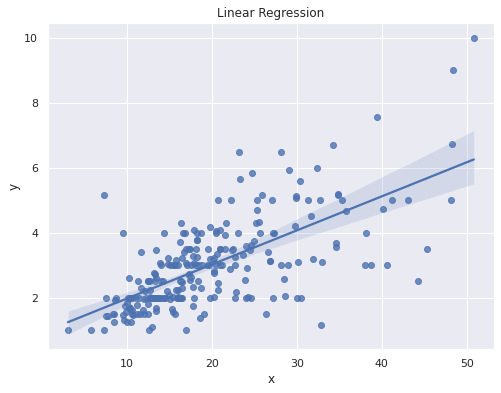

In [ ]:
# 단순선형회귀를 그리기 위한 코드
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.set_theme(color_codes=True)

tips = sns.load_dataset("tips")

sns.regplot(x="total_bill", y="tip", data=tips)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression');

우선, 머신러닝 모델의 목표는 실제값의 예측입니다. <br> 
그 중에서도 ***더 정확하게 실제값을 예측하는 것***이 머신러닝 모델의 목표인데요.

다양한 머신러닝모델 중에서도 오늘 우리가 배우는 **단순선형회귀**는 <br>
주어진 데이터 **`x`**를 기반으로 **`y`**의 값을 예측하는 **`best-fit regression line`**을 가지는 것을 목표로 합니다.

그럼 이 **`best-fit regression line`**이 학습되어지는 과정을 배워보도록 합니다.

<br>

- **단순선형회귀의 수학적 표현** <br>
  - 우리가 지금 사용하는 모델인 단순선형회귀는 **`x`**를 넣었을 때, **`y`** 값을 예측하는 **선형 모델**로서 수학적으로는 아래와 같이 표현 할수 있습니다. 여기서 $\theta_0$는 **`y-절편`**이고 $\theta_1$는 **`기울기`** 입니다

$$h_{\theta}(x) = \theta_0 + \theta_1x$$ 
 
<br>

- **단순선형회귀의 오차함수**
  - 모델이 데이터를 training하는 과정에서, 모델은 **`예측값`**과 **`실제값`** 사이의 거리를 [Mean Squared Error](https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss)를 통해 계산해 오차 함수를 구합니다. 선형회귀모델의 오차 함수는 아래와 같습니다. 
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^i) - y^i)^2$$


<br>

- **오참함수 그래프**
  - 위의 오차함수를 시각화 하면 아래와 같이 **bowl-shaped function** 입니다. 선형회귀 모델의 목표는 오차 함수 $J(\theta_1, \theta_2)$를 최소화 하는 $\theta_1, \theta_2$를 찾는것 입니다.
  - 일반적으로 **`전역 최소값, global minimum`**과 **`지역 최소값, local minimum`**이 존재 하는것에 비해 선형회귀의 경우 위의 그림처럼 bowl-shaped function의 형태만을 가지기 때문에 **`global minium`**밖에 존재하지 않습니다. 그러므로, ***선형회귀는 필연적으로 global minimum으로 수렴합니다.***
  
  <img src = 'https://i.imgur.com/oRdGx23.png' width="400" height="300">


> **💡 Tip** <br>
단순선형회귀는 이 오차 함수의 최소값을 찾는 것을 목표로 합니다. <br> 이 오차 함수를 최소화 하기 위해서, 모델은 오차 함수의 최소값을 내는  $\theta_1, \theta_2$을 찾아야 하는데요. 이를 아래의 경사하강 알고리즘을 통해서 찾도록 합니다. 

<br>


- **단순선형회귀를 위한 경사하강 알고리즘**
  - 우리는 오차함수의 **최소값**에서의 **기울기가 0**이라는 것을 위에서 배웠습니다. 최적의 가설함수를 구하기 위해 경사 하강 알고리즘을 아래와 같이 적용합니다. 그리고 위의 공식을 우리가 최소값에 도달할때까지 아래와 같이 반복합니다. 

<p align="center">
<img src = 'https://i.imgur.com/xpphlkj.png' width="400" height="300">

<p align="center">
<img src = 'https://i.imgur.com/Scm66ZF.png' width="350" height="200">


<br>

- **선형회귀모델의 학습과정** <br>
  - 모델이 데이터를 training하는 과정에서, 모델은 예측값과 실제값사이의 거리를 root mean squared error를 통해 계산해 cost function을 구합니다. 그리고 단순선형회귀는 cost function을 최소화 하는 것을 목표로 합니다. 이를 위해서 모델은 cost function의 최소화하는 $\theta_1, \theta_2$ 을 찾아야 하는데요. 그 과정은 다음과 같습니다.

   **`1.`** 우선 모델은 랜덤으로 $\theta_1$과 $\theta_2$을 선택합니다. <br>
   **`2.`** 그리고 cost function이 최소값에 도달할때까지 iteratively 이 값들을 업데이트하게 되는데요. <br>
   **`3.`** 모델이 cost function의 최소값에 도달했을때, 우리는 최상의 $\theta_1, \theta_2$을 가지게 됩니다. <br>
   **`4.`** 이렇게 최종적으로 업데이트된 $\theta_1, \theta_2$를 이용하여 모델은 y값을 예측하게 됩니다. <br>













